### Goal  
show the importance of data preprocessing ,feature exploration and feature engineering

python library 
>NumPy stand for Numerical Python
What is the NumPy library?
NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

link:https://www.youtube.com/watch?v=NzDQTrqsxas&ab_channel=MachineLearnia
pandas

>Pandas is a high-level data manipulation tool that is built on the NumPy package.

link :https://pypi.org/project/pandas/

>Sci-kit learn
Built on NumPy, SciPy, and matplotlib
Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language . It offers various classification , regression and clustering algorithms including support vector machines , random forest , gradient boosting (like XGBoost ), k-means and DBSCAN . 

link:https://scikit-learn.org/stable/

>Matplokib
Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. 

link: https://matplotlib.org/stable/tutorials/index.html
Almost entire workflow is covered by these four libraries

1. Modelling Overview 
2. Introduce the Data
3. Basic Data cleaning
     * Dealing with data type
     * Handling missing data
4. More data Exploration
    * Outliers detection
    * Plotting distributions
5. Feature Engineering
    * interactions between features
    * Dimensionality reduction using PCA

### import libraries

In [1]:
import numpy as np
import pandas as pd

> different function to read type of file with pandas
pd.read_"type"(r'path')
example
df=pd.read_csv(r'C:user/files/adult.csv')

>or to write 
titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False)
mean you're transforming your titanic dataframe to an excel file

>here is the link for explanation
https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html
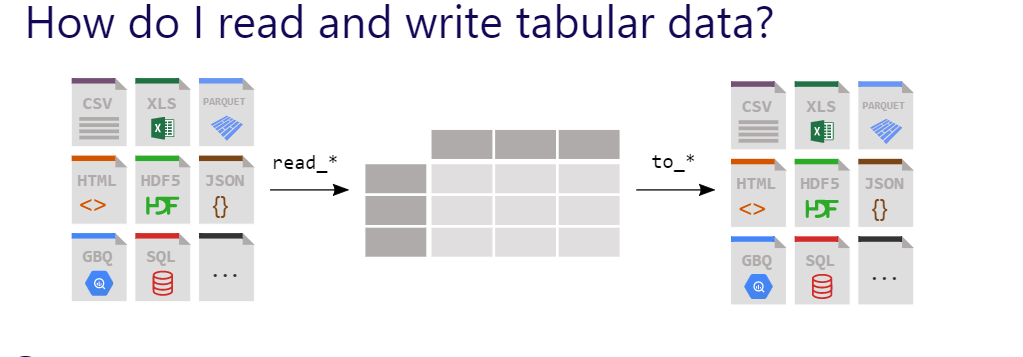

In [3]:
#read you data
df=pd.read_csv('adult.csv')

In [4]:
#show the 5 first ligne of your data
print(df.head(5))

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [5]:
#show the 5 last ligne of your data
print(df.tail(5))

       age      workclass  fnlwgt    education  education_num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation relationship    race      sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       capital-gain  capital-loss  hours-per-week  native-country  income  
32556             0             0              38   

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
#take a look to the income variable
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [8]:
#change my income to a binary variable 0 if income is >50K  and 1 if <50K
df["income"]=[0 if x =="<=50K " else 1 for x in df.income]

In [9]:
df["income"].head(5)

0    1
1    1
2    1
3    1
4    1
Name: income, dtype: int64

In [10]:
#assign X as a dataframe and y as a Series of the outcome variable 

X=df.drop("income",1)
y=df.income

In [11]:
print(X.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  
0          2174             0              40   United-States  
1           

##### Dealing with data types
#### There are main data types
> 1. numerical 

>2. categorical
variable takes on a limited, and usually fixed, number of possible values. Examples are gender, social class, rating via Likert scales.

>2. ordinal
An ordinal variable is similar to a categorical variable. The difference between the two is that there is a clear ordering of the categories. For example, suppose you have a variable, economic status, with three categories (low, medium and high).

*model can only  handle numerical feature
you must convert categorical features into numeric features*

In [12]:
print(X['education'].head(5))

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: object


In [13]:
#use get_dummies in pandas
#Another option: OneHotEncoder in Sci-kit learn

In [14]:
print(pd.get_dummies(X['education'].head(5)))

    11th   Bachelors   HS-grad
0      0           1         0
1      0           1         0
2      0           0         1
3      1           0         0
4      0           1         0


In [15]:
X['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
#decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes=='object':
        unique_cat=len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
        col_name=col_name,unique_cat=unique_cat))

Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital_status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native-country' has 42 unique categories


In [17]:
print(X["native-country"].value_counts().sort_values(ascending=False).head(5))

 United-States    29170
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
Name: native-country, dtype: int64


In [18]:
X["native-country"]

0         United-States
1         United-States
2         United-States
3         United-States
4                  Cuba
              ...      
32556     United-States
32557     United-States
32558     United-States
32559     United-States
32560     United-States
Name: native-country, Length: 32561, dtype: object

##### exemple of whitespace removal

In [19]:
nom="   ami samyra   "

In [20]:
nom

'   ami samyra   '

In [21]:
nom=nom.strip()

In [22]:
nom

'ami samyra'

In [23]:
#USE STRIP TO REMOVE DE WHITESPACES
X["native-country"]=[x.strip() for x in X["native-country"]]

In [24]:
X["native-country"]=['United-States' if x =='United-States' else 'Other' for x in X["native-country"]]

In [25]:
for x in X["native-country"].head():
     if x != 'United-States':
        print(x)
    

Other


In [26]:
print(X["native-country"].value_counts().sort_values(ascending=False))

United-States    29170
Other             3391
Name: native-country, dtype: int64


In [29]:
#create a list of features to dummy
todummy_list=['workclass','education','marital_status','occupation','relationship','race','sex']

In [30]:
#A function to apply  get_dummmies on my list of feature

def dummy_df(df,todummy_list):
    for x in todummy_list:
        dummies=pd.get_dummies(df[x],prefix=x,dummy_na=False)
        df= df.drop(x,1)
        df=pd.concat([df,dummies],axis=1)
    return df

In [31]:
#call of my dummy_df function
X=dummy_df(X,todummy_list)
print(X.head(5))

   age  fnlwgt  education_num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  native-country  workclass_ ?  workclass_ Federal-gov  workclass_ Local-gov  \
0  United-States             0                       0                     0   
1  United-States             0                       0                     0   
2  United-States             0                       0                     0   
3  United-States             0                       0                     0   
4          Other             0                       0                     0   

   ...  relationship_ Own-child  relationship_ Unmarried

### B. Handling missing data

Models cannot handle missing data

>simplest solution
remove observation or features that have missing data 
but ,removing missing dta can introduuce a lo of issues
data is randomly missing :potentially lose a lot of your data
usually this is a poor solution

>An alternative is to use imputation
replace missiing value with another value 
strategies is a poor solution

### exercice

https://skp2707.medium.com/dealing-with-data-types-in-pandas-c32c506e7917

https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

### C. Data exploration